In [1]:
import random
from time import perf_counter

from algorithms_sc.sorts import heap_sort, bitonic_sort
from algorithms_sc.sorts.utils import generate_stand
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Задание

Сравнить алгоритмы битонической и пирамидальной сортировки по времени в двух варинтах:
- в зависимости от длины массива
- в зависимости от степени отсортированности массива (при фиксированной длине $\approx 10^4$)

## 1. Зависимость от длины массива

In [14]:
EXP1_ARR_LENGTHS = [2 ** i for i in range(2, 8)]
N_REPEATS = 10000

exp1_metrics = []
with tqdm(total=len(EXP1_ARR_LENGTHS) * N_REPEATS, desc='Experiment 1') as pbar:
    for arr_len in EXP1_ARR_LENGTHS:
        current_metrics = []
        for _ in range(N_REPEATS):
            heap_lst = random.sample(range(10 * arr_len), arr_len)
            bitonic_lst = heap_lst.copy()

            start_time = perf_counter()
            _ = heap_sort(heap_lst)
            heap_endtime = perf_counter()

            _ = bitonic_sort(bitonic_lst)
            bitonic_endtime = perf_counter()

            current_metrics.append([heap_endtime - start_time, bitonic_endtime - heap_endtime])
            pbar.update()
        exp1_metrics.append(current_metrics)

exp1_metrics = np.array(exp1_metrics)


Experiment 1: 100%|██████████| 60000/60000 [00:42<00:00, 1402.99it/s]


In [15]:
mean_exp1 = np.mean(exp1_metrics, axis=1)
std_exp1 = np.std(exp1_metrics, axis=1)

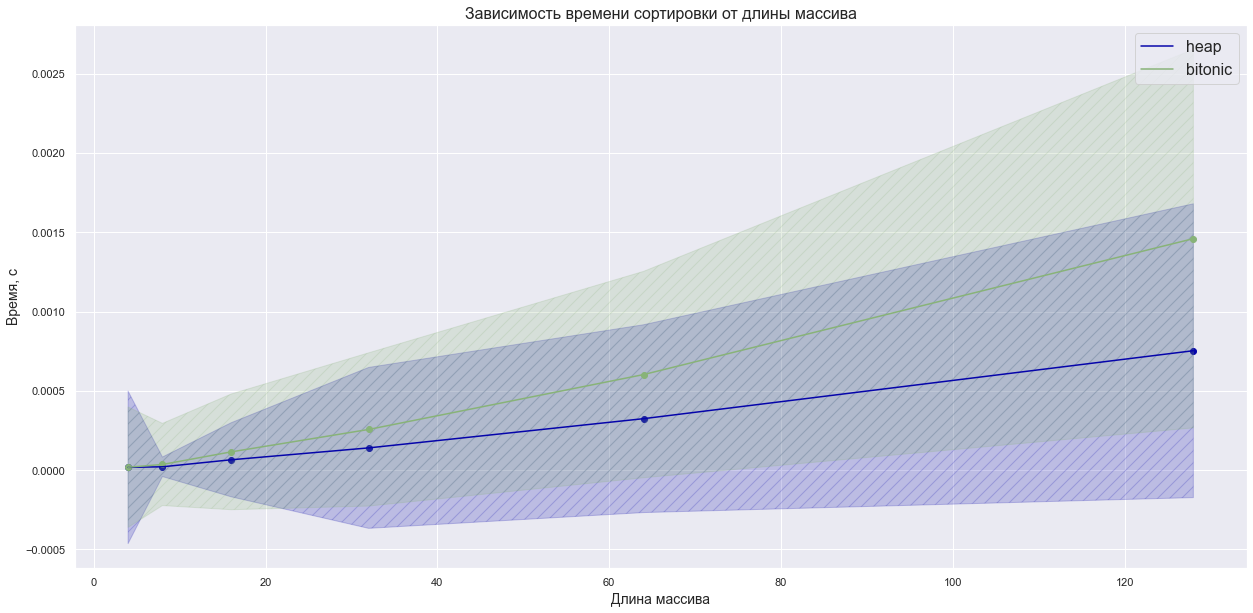

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
ax.plot(EXP1_ARR_LENGTHS, mean_exp1[:, 0], label='heap', color=sns.xkcd_rgb['royal blue'])
ax.scatter(EXP1_ARR_LENGTHS, mean_exp1[:, 0], marker='o', color=sns.xkcd_rgb['royal blue'])
ax.fill_between(EXP1_ARR_LENGTHS, mean_exp1[:, 0] + std_exp1[:, 0], mean_exp1[:, 0] - std_exp1[:, 0], hatch='//', color=sns.xkcd_rgb['royal blue'], alpha=0.2)

ax.plot(EXP1_ARR_LENGTHS, mean_exp1[:, 1], label='bitonic', color=sns.xkcd_rgb['sage green'])
ax.scatter(EXP1_ARR_LENGTHS, mean_exp1[:, 1], marker='o', color=sns.xkcd_rgb['sage green'])
ax.fill_between(EXP1_ARR_LENGTHS, mean_exp1[:, 1] + std_exp1[:, 1], mean_exp1[:, 1] - std_exp1[:, 1], hatch='//', color=sns.xkcd_rgb['sage green'], alpha=0.2)
ax.legend(fontsize=16)
ax.set_title('Зависимость времени сортировки от длины массива', fontsize=16)
ax.set_xlabel('Длина массива', fontsize=14)
ax.set_ylabel('Время, с', fontsize=14);

## 2. Зависимость от степени отсортированности

In [2]:
STAND_LENGTH = 2 ** 11
N_REPEATS = 20

In [3]:
exp2_metrics = []

with tqdm(desc='Experiment 2', total=(2 * STAND_LENGTH + 1) * N_REPEATS) as pbar:
    for _ in range(N_REPEATS):
        current_metrics = []
        stand = generate_stand(STAND_LENGTH)
        for array in stand:
            bitonic_array = array.copy()

            start_time = perf_counter()
            _ = heap_sort(array)
            heap_endtime = perf_counter()

            _ = bitonic_sort(bitonic_array)
            bitonic_endtime = perf_counter()
            
            pbar.update()
            current_metrics.append([heap_endtime - start_time, bitonic_endtime - heap_endtime])
        exp2_metrics.append(current_metrics)

exp2_metrics = np.array(exp2_metrics)

Experiment 2: 100%|██████████| 81940/81940 [1:17:50<00:00, 17.54it/s]


In [4]:
mean_exp2 = np.mean(exp2_metrics, axis=0)
std_exp2 = np.std(exp2_metrics, axis=0)

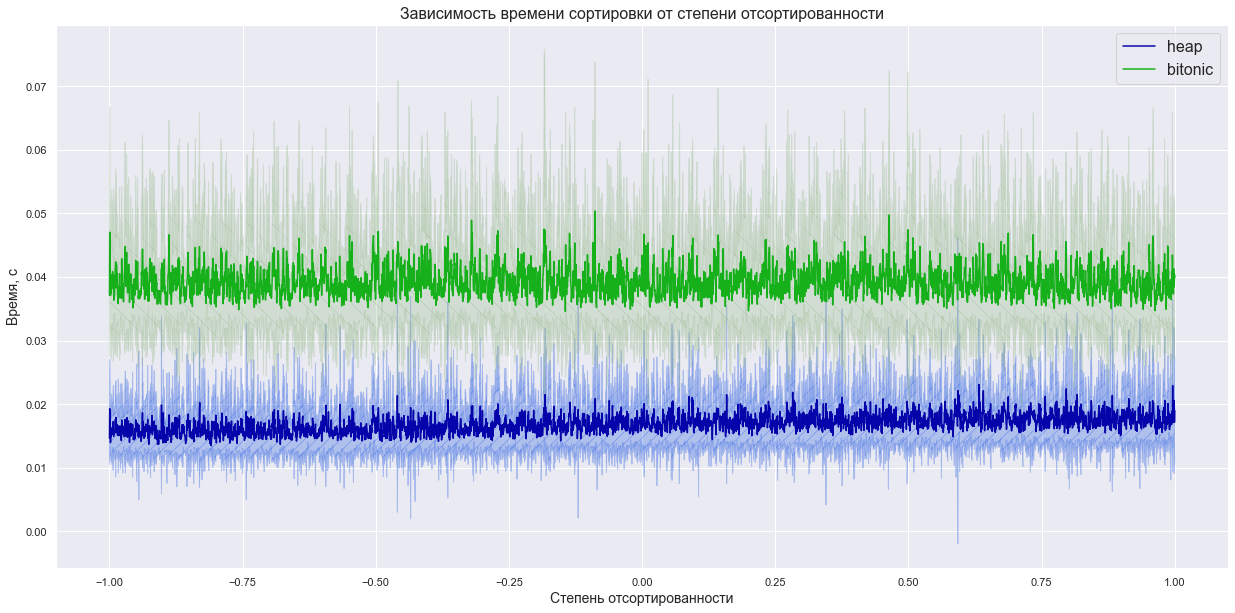

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(21, 10))
sort_ratio = [(x - STAND_LENGTH) / STAND_LENGTH for x in range(len(stand))]
ax.plot(sort_ratio, mean_exp2[:, 0], label='heap', color=sns.xkcd_rgb['royal blue'])
ax.plot(sort_ratio, mean_exp2[:, 1], label='bitonic', color=sns.xkcd_rgb['green'])

ax.fill_between(sort_ratio, mean_exp2[:, 0] + std_exp2[:, 0], mean_exp2[:, 0] - std_exp2[:, 0], hatch='//', color=sns.xkcd_rgb['blue'], alpha=0.25)
ax.fill_between(sort_ratio, mean_exp2[:, 1] + std_exp2[:, 1], mean_exp2[:, 1] - std_exp2[:, 1], hatch='\\', color=sns.xkcd_rgb['sage green'], alpha=0.25)

ax.legend(fontsize=16)
ax.set_title('Зависимость времени сортировки от степени отсортированности', fontsize=16)
ax.set_xlabel('Степень отсортированности', fontsize=14)
ax.set_ylabel('Время, с', fontsize=14);